<a href="https://colab.research.google.com/github/aneetalr/DSML-DL/blob/main/housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [3]:
house=pd.read_csv("/content/Housing_Price.csv")
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [10]:
house.shape

(20640, 10)

In [5]:
house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [8]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
house.value_counts("ocean_proximity")

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

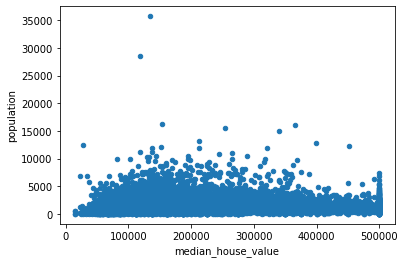

In [20]:
house.plot(kind="scatter",x="median_house_value",y="population")

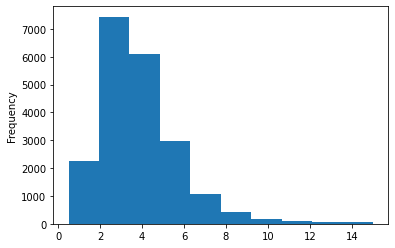

In [24]:
house["median_income"].plot(kind="hist")

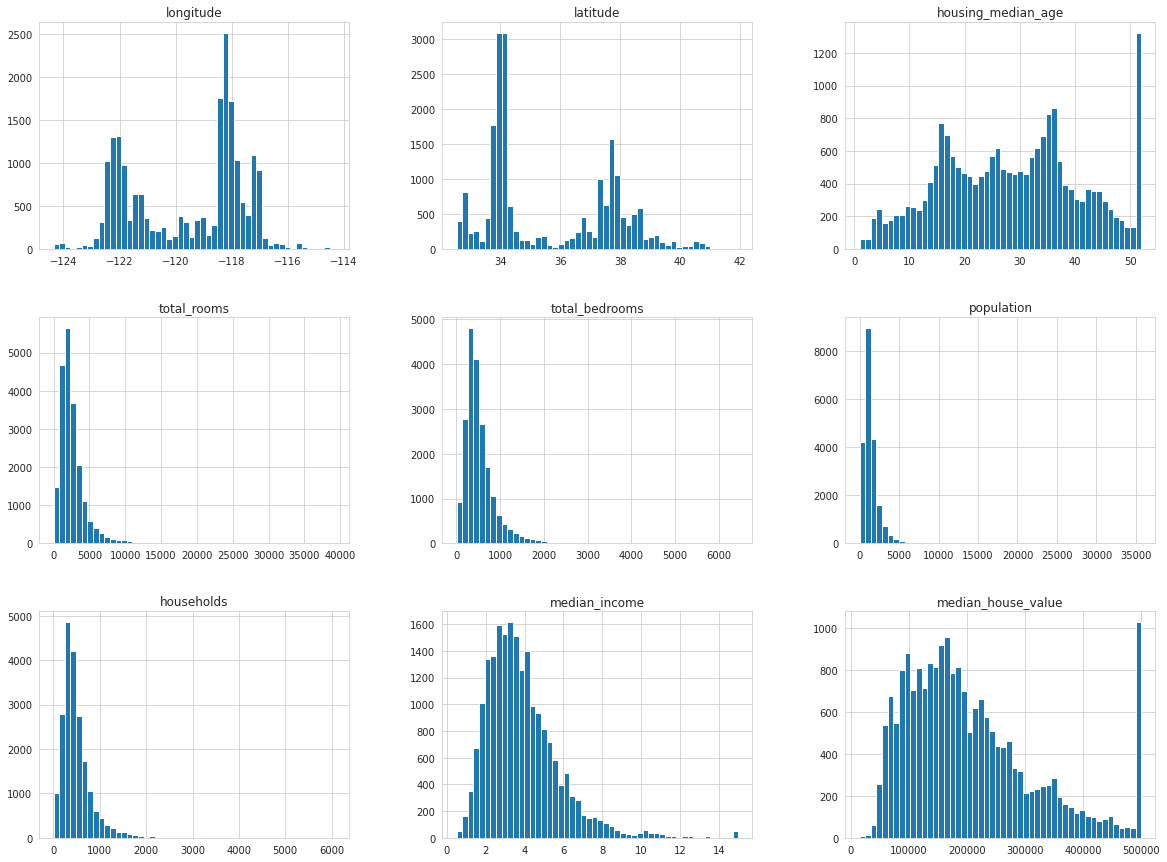

In [45]:
house.hist(bins=50, figsize=(20,15));
plt.show()

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

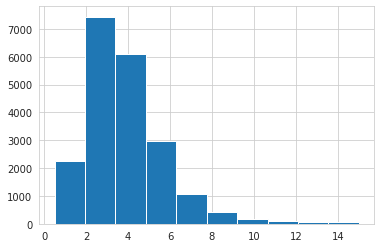

In [50]:
plt.hist(house.median_income)

In [27]:
features = ['longitude', 'latitude', 'median_income']
select_df = house[features]
select_df.columns

Index(['longitude', 'latitude', 'median_income'], dtype='object')

In [30]:
# Scale the features
X = StandardScaler().fit_transform(select_df)
X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

In [31]:
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(X)
model

KMeans(n_clusters=6)

In [32]:
centers = model.cluster_centers_
centers[:5]

array([[ 0.87481681, -0.85018701, -0.58009024],
       [-0.08012002,  0.23168851, -0.66013426],
       [-1.18984408,  0.97203035,  0.86411234],
       [ 0.21536151, -0.38398029,  3.41260306],
       [-1.16202211,  1.2712561 , -0.54973469]])

In [33]:
centers.shape

(6, 3)

In [34]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [35]:
# Function that creates Parallel Plots
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [36]:
P = pd_centers(features, centers)

In [37]:
# Returns the six clusters and their corresponding values for the centroids
P

,longitude,latitude,median_income,prediction
0,0.874817,-0.850187,-0.580090,0
1,-0.080120,0.231689,-0.660134,1
2,-1.189844,0.972030,0.864112,2
3,0.215362,-0.383980,3.412603,3
4,-1.162022,1.271256,-0.549735,4
5,0.771497,-0.827733,0.728211,5


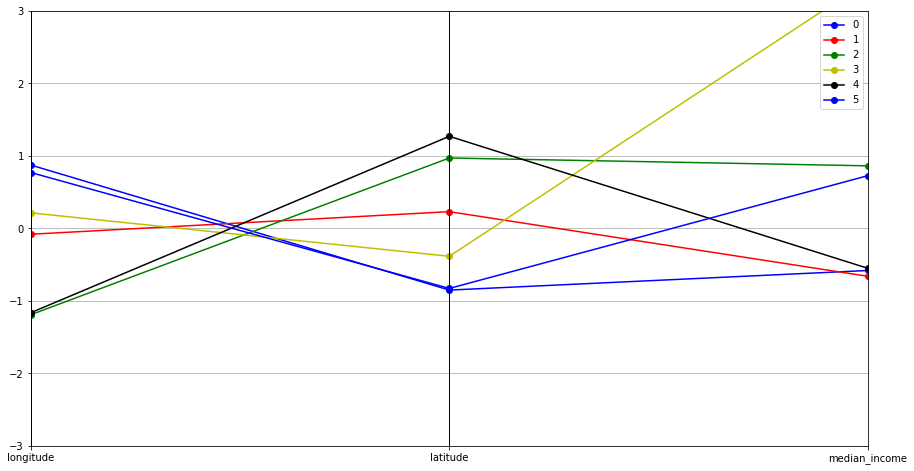

In [38]:
# Shows how different each cluster is across all features
parallel_plot(P)

In [40]:
# Create cluster label
house['econ_region'] = kmeans.fit_predict(X)
house['econ_region'] = house['econ_region'].astype("category")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,5
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0


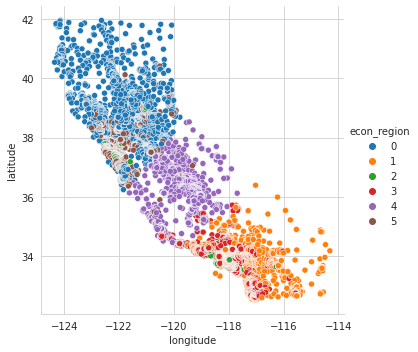

In [60]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=house, kind='scatter');

In [44]:
median_attributes = ['econ_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = house[median_attributes]
income_house.groupby(['econ_region']).describe()

median_house_value                                          \
                         count           mean            std       min   
econ_region                                                              
0                       4839.0  156264.566646   86762.620132   14999.0   
1                       6616.0  172709.231258   81683.093546   14999.0   
2                        556.0  465679.296763   69426.602081  112500.0   
3                       4169.0  272811.698249  102376.809518   14999.0   
4                       1658.0  105019.121834   68997.963566   26600.0   
5                       2802.0  285618.910064  103438.401808   67500.0   

                                                    median_income             \
                  25%       50%       75%       max         count       mean   
econ_region                                                                    
0             94200.0  134000.0  192450.0  500001.0        4839.0   2.814903   
1            117500.0  158500.0  202100.0  500001.0        6616.0   2.798166   
2            461550.0  500001.0  500001.0  500001.0         556.0  10.496313   
3            195000.0  247200.0  334400.0  500001.0        4169.0   5.323372   
4             61525.0   81650.0  118050.0  500001.0        1658.0   2.622373   
5            206725.0  269800.0  351475.0  500001.0        2802.0   5.488825   

             ...                     housing_median_age                        \
             ...        75%      max              count       mean        std   
econ_region  ...                                                                
0            ...   3.478800   4.5590             4839.0  30.644348  13.435782   
1            ...   3.437975   4.1458             6616.0  30.009674  11.614502   
2            ...  11.289425  15.0001              556.0  27.663669  13.904961   
3            ...   5.980600   8.4284             4169.0  26.476133  12.263344   
4            ...   3.211425   5.0100             1658.0  25.566948  11.120481   
5            ...   6.100700   9.5551             2802.0  27.172377  13.237211   

                                          
             min   25%   50%   75%   max  
econ_region                               
0            2.0  19.0  30.0  42.0  52.0  
1            1.0  21.0  31.0  38.0  52.0  
2            2.0  17.0  26.0  37.0  52.0  
3            1.0  16.0  27.0  35.0  52.0  
4            2.0  17.0  25.0  34.0  52.0  
5            1.0  17.0  26.0  36.0  52.0  

[6 rows x 24 columns]